# 10.2

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()

In [8]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)
imdb_dir = Path('/Users/aarondrexler/documents/github/dsc650/data/external/imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

In [9]:
training_samples = 200
maxlen = 500 
max_words = 2000 
embedding_dim = 100
training_samples = 200 
validation_samples = 10000 

In [10]:
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [11]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [12]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [13]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
summary_file = results_dir.joinpath('Assignment_10.2_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_val, y_val))
result_model_file = results_dir.joinpath('pre_trained_glove_model.h5')
model.save_weights(result_model_file)

Epoch 1/10
7/7 [==============================] - 1s 120ms/step - loss: 0.6966 - acc: 0.4703 - val_loss: 0.6928 - val_acc: 0.5115
Epoch 2/10
7/7 [==============================] - 1s 101ms/step - loss: 0.5752 - acc: 0.9481 - val_loss: 0.6933 - val_acc: 0.5143
Epoch 3/10
7/7 [==============================] - 1s 96ms/step - loss: 0.4203 - acc: 0.9792 - val_loss: 0.6991 - val_acc: 0.5142
Epoch 4/10
7/7 [==============================] - 1s 104ms/step - loss: 0.2528 - acc: 0.9674 - val_loss: 0.7005 - val_acc: 0.5265
Epoch 5/10
7/7 [==============================] - 1s 99ms/step - loss: 0.1495 - acc: 0.9931 - val_loss: 0.7039 - val_acc: 0.5273
Epoch 6/10
7/7 [==============================] - 1s 99ms/step - loss: 0.0822 - acc: 0.9963 - val_loss: 0.7383 - val_acc: 0.5208
Epoch 7/10
7/7 [==============================] - 1s 100ms/step - loss: 0.0541 - acc: 1.0000 - val_loss: 0.7206 - val_acc: 0.5307
Epoch 8/10
7/7 [==============================] - 1s 99ms/step - loss: 0.0295 - acc: 1.0000 -

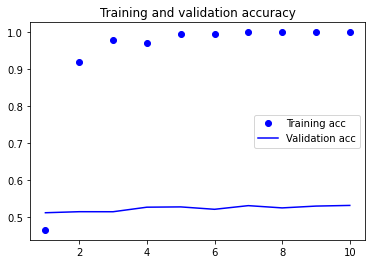

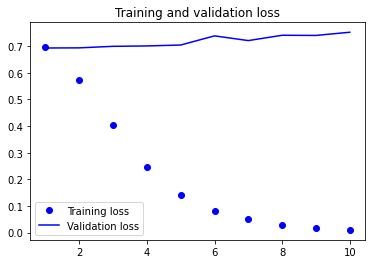

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.2_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [16]:
labels=[]
texts=[]
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [17]:
sequence = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)
model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)
print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))

782/782 [==============================] - 2s 2ms/step - loss: 0.7500 - acc: 0.5329

[0.750030517578125, 0.5329200029373169]
Complete: --- 453.8152759075165 seconds has passed ---
